In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/dataset-case-iqvia.csv', sep=',')

df.head()

,week_dt,dsupp_id,product_id,region_nm,units_qty,product_attr_1,product_attr_2,product_attr_3
0,2024-03-31,6,233.0,Norte,6.0,B,C,B24
1,2024-03-01,6,233.0,Norte,1.0,B,C,B24
2,2024-08-01,6,233.0,Norte,1.0,B,C,B24
3,2024-09-29,6,233.0,Norte,1.0,B,C,B24
4,2024-05-01,6,233.0,Norte,3.0,B,C,B24


# EDA

## Dicionário de variáveis:
- week_dt: data correspondente ao primeiro dia da semana.
- dsupp_id: código de identificação do distribuidor do produto.
- product_id: código de identificação do produto.
- region_nm: macrorregião do ibge cuja loja, na qual o produto foi vendido, está situada.
- units_qty: quantidade de unidades vendidas na semana.
- product_attr_1, product_attr_2 e product_attr_3: atributos específicos dos produtos.

In [3]:
# Convertendo para datetime
df['week_dt'] = pd.to_datetime(df['week_dt'])

df = df.sort_values('week_dt', ascending=True).reset_index(drop=True)

df['week_dt']

0        2022-11-01
1        2022-11-01
2        2022-11-01
3        2022-11-01
4        2022-11-01
            ...    
120585   2024-10-27
120586   2024-10-27
120587   2024-10-27
120588   2024-10-27
120589   2024-10-27
Name: week_dt, Length: 120590, dtype: datetime64[ns]

In [4]:
print("="*50 + " Default Checking " + "="*50)
print("NaN Values:")
for column in df.columns:
    if df[column].isnull().sum() == 0:
        print(f"The column {column} is ok!")
    else:
        print(f"The column {column} have {df[column].isnull().sum()} NaN values")
print("="*100)
print("Rows Duplicated:")
if df.duplicated().sum() > 0:
    print("Found rows duplicated! Removing...")
    df.drop_duplicates(inplace=True)
else:
    print("Not Found rows duplicated")
print("="*50 + " Describe " + "="*50)
df.describe()

================================================== Default Checking ==================================================
NaN Values:
The column week_dt is ok!
The column dsupp_id is ok!
The column product_id have 1 NaN values
The column region_nm have 1 NaN values
The column units_qty have 1 NaN values
The column product_attr_1 have 1 NaN values
The column product_attr_2 have 1 NaN values
The column product_attr_3 have 1 NaN values
Rows Duplicated:
Not Found rows duplicated
================================================== Describe ==================================================


,week_dt,dsupp_id,product_id,units_qty
count,120590,120590.000000,120589.000000,120589.000000
mean,2023-11-03 12:20:06.547806976,9.639265,204.745972,51.720213
min,2022-11-01 00:00:00,0.000000,1.000000,0.010000
25%,2023-05-01 00:00:00,6.000000,117.000000,2.000000
50%,2023-11-12 00:00:00,6.000000,214.000000,6.000000
75%,2024-04-28 00:00:00,11.000000,296.000000,23.000000
max,2024-10-27 00:00:00,27.000000,390.000000,24074.000000
std,NaN,6.682240,109.512936,284.258688


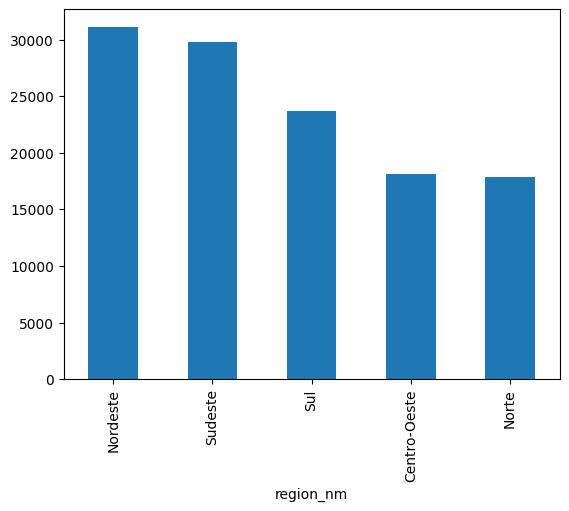

In [5]:
df['region_nm'].value_counts().plot(kind='bar')
plt.show()

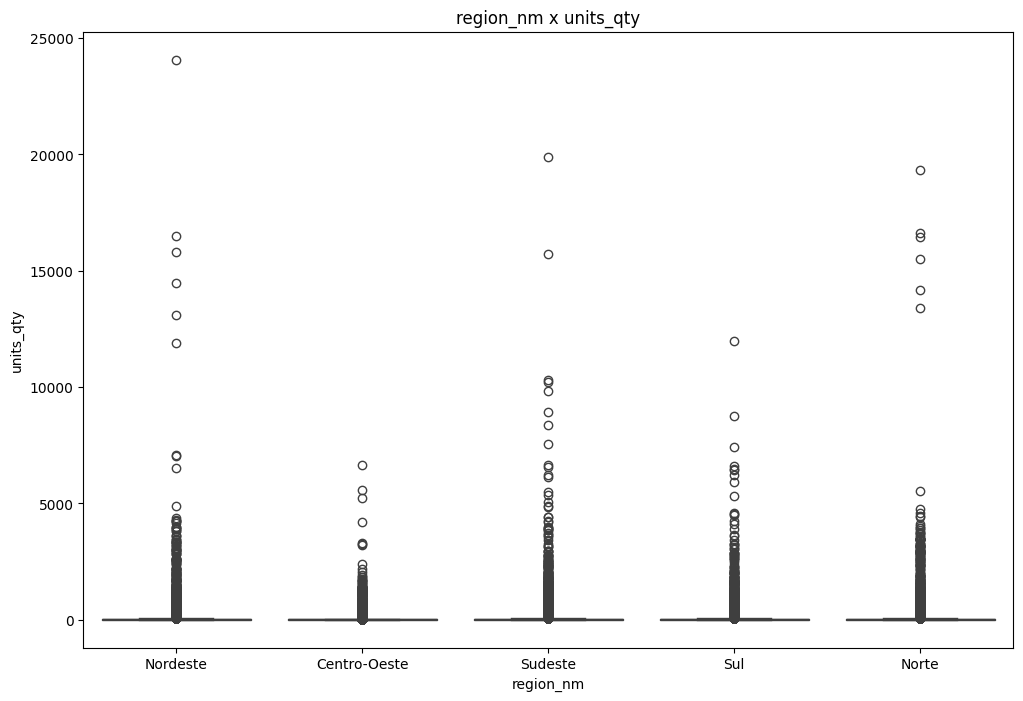

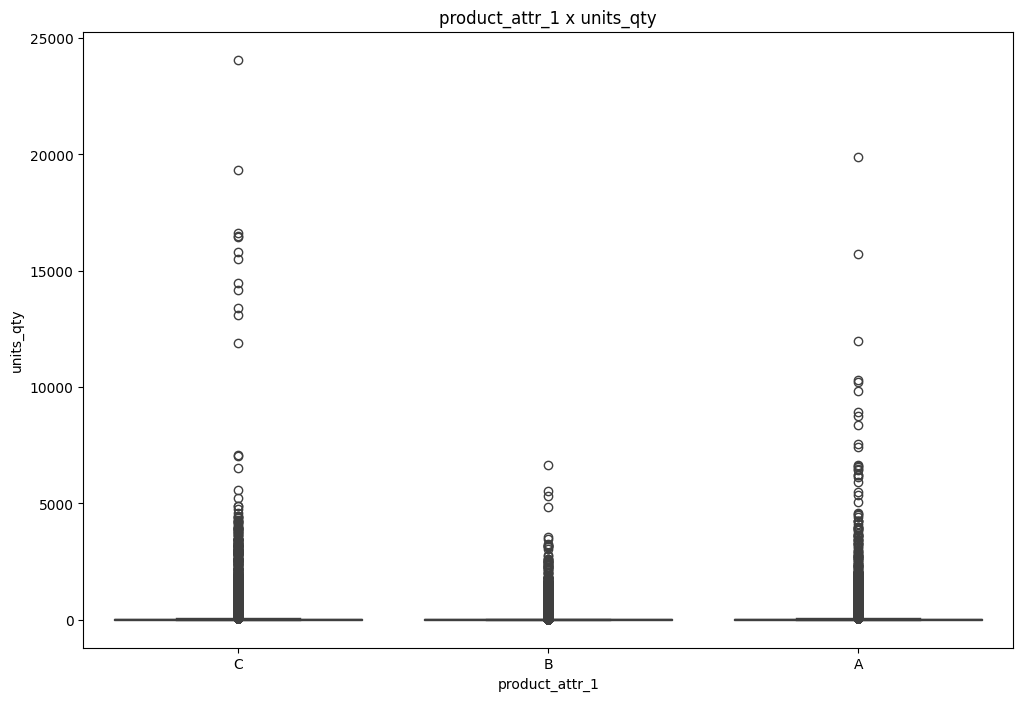

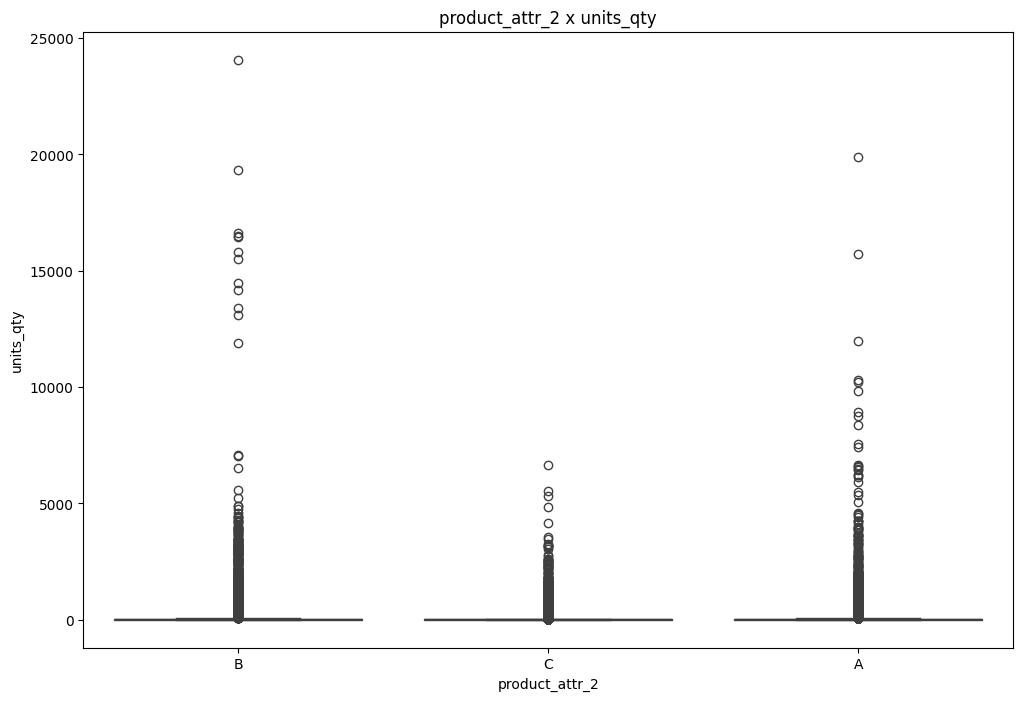

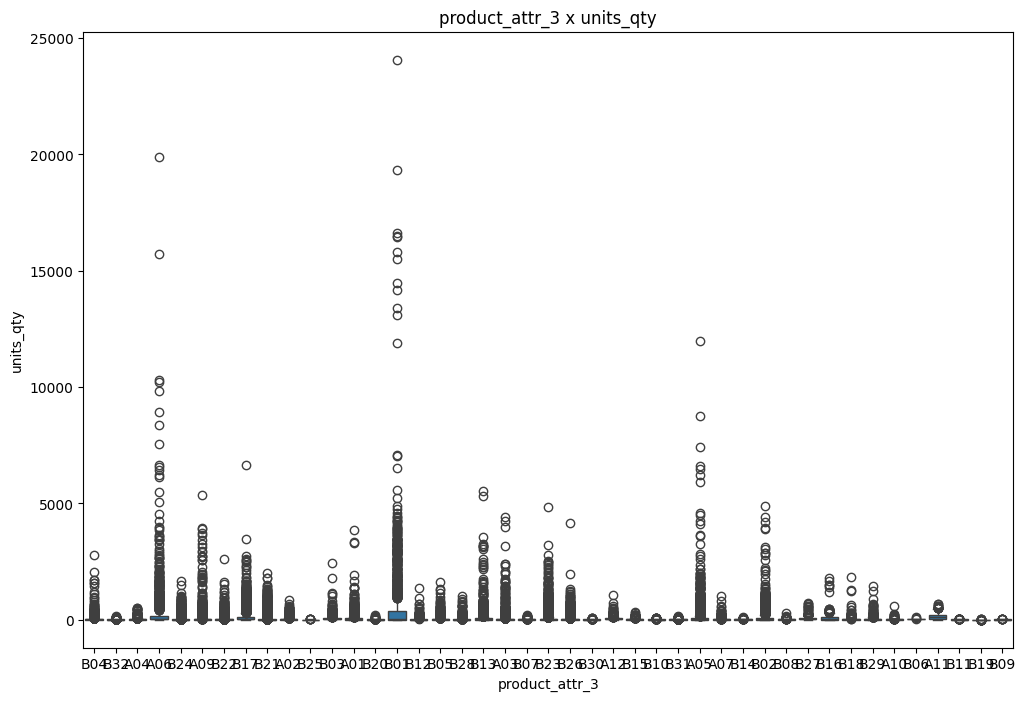

In [19]:
columns = ['region_nm', 'product_attr_1', 'product_attr_2', 'product_attr_3']

for column in columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, y='units_qty', data=df)
    plt.title(f"{column} x units_qty")
    plt.show()

# Existencia de outliers na maior parde em regiões de Nordeste, Sudeste e Norte, o que pode indiciar certos eventos exclusivos que pode ocorrer nessas regiões (promoção, surto)

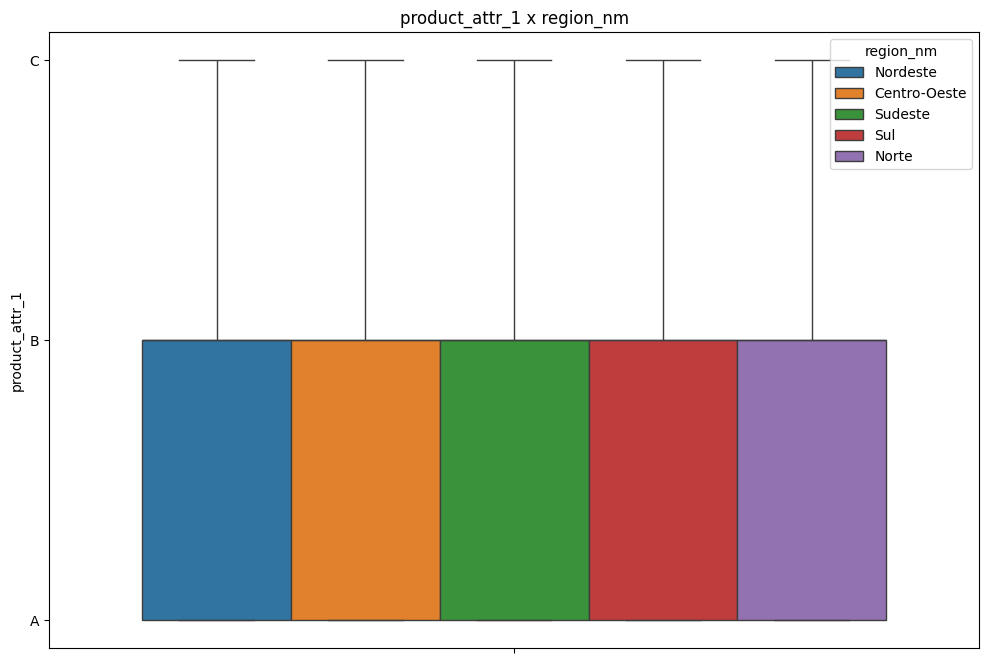

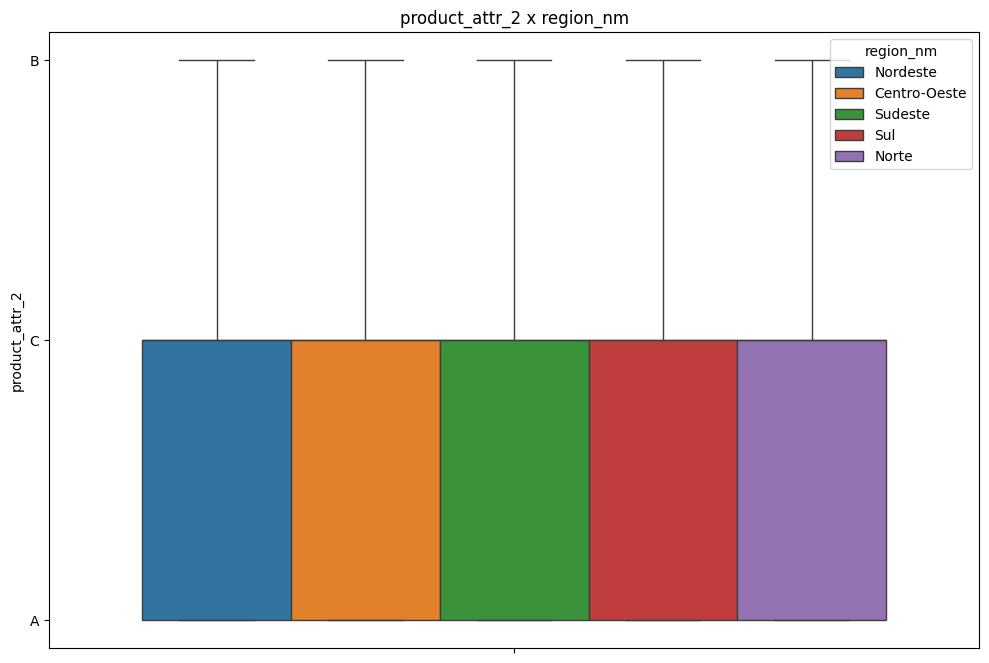

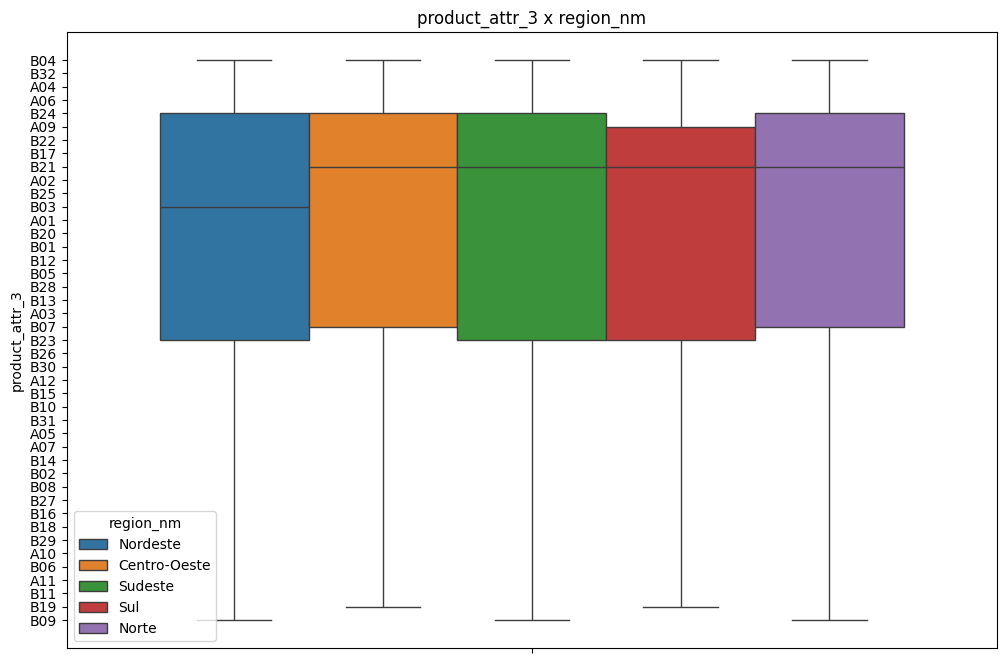

In [15]:
columns = ['product_attr_1', 'product_attr_2', 'product_attr_3']

for column in columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=column, hue='region_nm', data=df)
    plt.title(f"{column} x region_nm")
    plt.show()

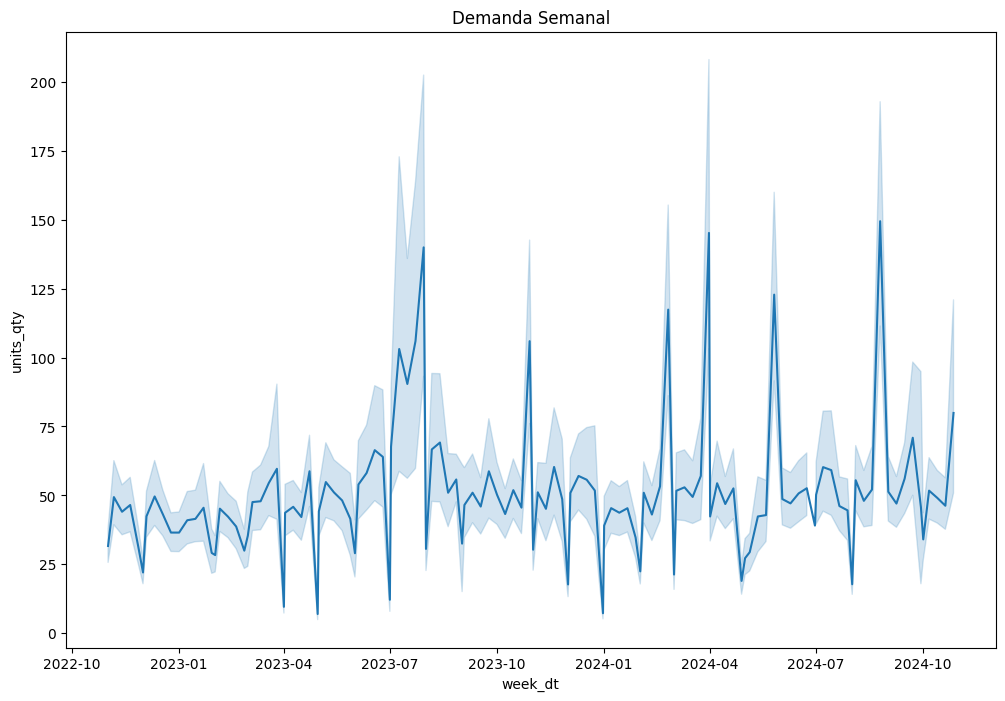

In [17]:
plt.figure(figsize=(12,8))
sns.lineplot(x='week_dt', y='units_qty', data=df)
plt.title("Demanda Semanal")
plt.show()
# Não há uma tendência clara de alta
# Há picos a cada 2-3 meses, que pode representar uma sazonalidade
# Esses picos podem estar associados a ciclos promocionais, datas sazonais do setor farmacêutico (ex: campanhas de vacinação, início de inverno/verão), ou renovação de estoque dos distribuidores.
# Existência de outliers, acima de 150.
# Apesar de um tendência não muita clara, visualmente não apresenta uma série estacionaria

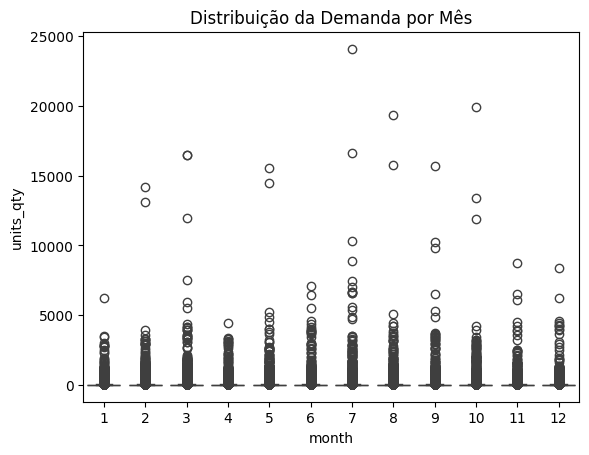

In [21]:
df['month'] = df['week_dt'].dt.month
sns.boxplot(x='month', y='units_qty', data=df)
plt.title('Distribuição da Demanda por Mês')
plt.show()

# Conclusão